In [1]:
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cmath

In [2]:
CC = 1.5147  # in angstroms
SC = 1.82  # in angstroms
CCC = 109.5 * (np.pi / 180)  # convert to radians
chainlength = 7000

# Types of atoms, bondtypes, angletypes, dihedral types
a_type = 2  # atoms type C=2, S=3
b_type = 2  # CC=1, CS = 2
ang_type = 2  # CCC = 1, SCC = 2
dih_type = 2  # CCCC = 1, SCCC = 2


In [3]:
def generate_linear_coordinates(CC, SC, CCC, chainlength):
    bond_length_c_c = CC  # in angstroms
    bond_length_s_c = SC  # in angstroms
    bond_angle_c_c_c = CCC # convert to radians
    # C= 1 # type-1
    # S = 2 # type-2
    
    coords = []
    
    # First sulfur atom
    coords.append([3, 0.0, 0.0, 0.0])
    
    # First carbon atom
    x = bond_length_s_c*np.sin(bond_angle_c_c_c/2)
    coords.append([2, 0, 0, x])
    
    # Generate coordinates for the other carbon atoms
    for i in range(1, chainlength):
        x += bond_length_c_c*np.sin(bond_angle_c_c_c/2)
        coords.append([2, 0, 0, x])
    
    # Second sulfur atom
    x += bond_length_s_c*np.sin(bond_angle_c_c_c/2)
    coords.append([3, 0, 0, x])
    
    return coords

def write_xyz_file(filename, coordinates):
    with open(filename, "w") as f:
        f.write(f"{len(coordinates)}\n")
        f.write("S-C8-S molecule\n")
        for coord in coordinates:
            f.write(f"{str(coord[0])} {coord[1]:.6f} {coord[2]:.6f} {coord[3]:.6f}\n")

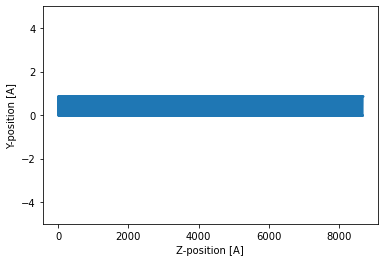

In [4]:
coordinates = generate_linear_coordinates(CC, SC, CCC, chainlength)
coordinates = np.array(coordinates)
coordinates[1::2][:, 2] = coordinates[1::2][:, 2] + CC*np.cos(CCC/2)

plt.plot(coordinates[:, 3], coordinates[:, 2], 'o-', markersize=1)
plt.ylim(-5, 5)
plt.xlabel('Z-position [A]')
plt.ylabel('Y-position [A]')
plt.show()

In [5]:
atom_id = np.arange(coordinates.shape[0])+1
molecule_id = np.ones(coordinates.shape[0])
charge = np.zeros(coordinates.shape[0])
atom_type = coordinates[:, 0]
xyz = coordinates[:, 1:]
atom_full = np.hstack((atom_id[:, None], molecule_id[:, None], atom_type[:, None], charge[:, None], xyz))

In [6]:
# Calculating the bond ids:

bond_type = np.zeros(atom_full.shape[0]-1)
bonds = np.zeros((atom_full.shape[0]-1, 4))
for i in range(atom_full.shape[0]-1):
    
    x = int(atom_full[:, 0][i:i+2][0])-1  # used for checking bond type
    y = int(atom_full[:, 0][i:i+2][1])-1  # used for checking bond type

    if atom_full[x, 2] == 2 and atom_full[y, 2] == 2:
        bt = 1
    if  atom_full[x, 2] == 3 or atom_full[y, 2] == 3:
        bt = 2
    bond_type[i] = bt
#     print(i+1, bond_type[i], atom_full[:, 0][i:i+2])
    bonds[i, 0] = i+1
    bonds[i, 1] = bond_type[i]
    bonds[i, 2] = atom_full[:, 0][i:i+2][0]
    bonds[i, 3] = atom_full[:, 0][i:i+2][1]

# print(bonds)

In [7]:
# Calculating the angle ids:

angle_type = np.zeros(atom_full.shape[0]-2)
angles = np.zeros((atom_full.shape[0]-2, 5))
for i in range(atom_full.shape[0]-2):
    
    x = int(atom_full[:, 0][i:i+3][0])-1  # used for checking bond type
    y = int(atom_full[:, 0][i:i+3][1])-1  # used for checking bond type
    z = int(atom_full[:, 0][i:i+3][2])-1  # used for checking bond type

    if atom_full[x, 2] == 2 and atom_full[y, 2] == 2 and atom_full[z, 2] == 2:
        at = 1
    if  atom_full[x, 2] == 3 or atom_full[y, 2] == 3 or atom_full[z, 2] == 3:
        at = 2
    angle_type[i] = at
#     print(i+1, bond_type[i], atom_full[:, 0][i:i+2])
    angles[i, 0] = i+1
    angles[i, 1] = angle_type[i]
    angles[i, 2] = atom_full[:, 0][i:i+3][0]
    angles[i, 3] = atom_full[:, 0][i:i+3][1]
    angles[i, 4] = atom_full[:, 0][i:i+3][2]

# print(angles)

In [8]:
# Calculating the dihedral angle ids:

dangle_type = np.zeros(atom_full.shape[0]-3)
dangles = np.zeros((atom_full.shape[0]-3, 6))
for i in range(atom_full.shape[0]-3):
    
    x = int(atom_full[:, 0][i:i+4][0])-1  # used for checking bond type
    y = int(atom_full[:, 0][i:i+4][1])-1  # used for checking bond type
    z = int(atom_full[:, 0][i:i+4][2])-1  # used for checking bond type
    w = int(atom_full[:, 0][i:i+4][3])-1  # used for checking bond type
    if atom_full[x, 2] == 2 and atom_full[y, 2] == 2 and atom_full[z, 2] == 2 and atom_full[w, 2] == 2:
        dat = 1
    if atom_full[x, 2] == 3 or atom_full[y, 2] == 3 or atom_full[z, 2] == 3 or atom_full[w, 2] == 3:
        dat = 2
    dangle_type[i] = dat
#     print(i+1, bond_type[i], atom_full[:, 0][i:i+2])
    dangles[i, 0] = i+1
    dangles[i, 1] = dangle_type[i]
    dangles[i, 2] = atom_full[:, 0][i:i+4][0]
    dangles[i, 3] = atom_full[:, 0][i:i+4][1]
    dangles[i, 4] = atom_full[:, 0][i:i+4][2]
    dangles[i, 5] = atom_full[:, 0][i:i+4][3]

# print(dangles)

In [9]:
atom_full[0, 4:][0]  # xlo
atom_full[-1, 4:][0]  # xhi

0.0

In [10]:
chain_str = f'chain_structure_{chainlength}.lmp'
n_atoms = chainlength + 2
n_bonds = bonds.shape[0]
n_angles = angles.shape[0]
n_dihedrals = dangles.shape[0]

a_type = 3  # atoms type C=2, S=3
b_type = 2  # CC=1, CS = 2
ang_type = 2  # CCC = 1, SCC = 2
dih_type = 2  # CCCC = 1, SCCC = 2

xlo = atom_full[0, 4:][0] -2 
xhi = atom_full[-1, 4:][0] + 2
ylo = atom_full[0, 5:][0] -2
yhi = atom_full[-1, 5:][0] + 2
zlo = atom_full[0, 6:][0] -2
zhi = atom_full[-1, 6:][0] + 2

with open(chain_str, "w") as file:
    file.write("# LAMMPS chain structure written by python" + "\n")
    file.write(str(int(n_atoms))+ '\t' + "atoms" +"\n")
    file.write(str(int(n_bonds))+ '\t' + "bonds" +"\n")
    file.write(str(int(n_angles))+ '\t' + "angles" +"\n")
    file.write(str(int(n_dihedrals))+ '\t' + "dihedrals" +"\n")
    file.write("\n")
    
    file.write(str(int(a_type))+ '\t' + "atom types" +"\n")
    file.write(str(int(b_type))+ '\t' + "bond types" +"\n")
    file.write(str(int(ang_type))+ '\t' + "angle types" +"\n")
    file.write(str(int(dih_type))+ '\t' + "dihedral types" +"\n")
    
    file.write(str(float(xlo))+ " " + str(float(xhi))+ " "+ "xlo" + " " + "xhi"+ "\n")
    file.write(str(float(ylo))+ " " + str(float(yhi))+ " "+ "ylo" + " " + "yhi"+ "\n")
    file.write(str(float(zlo))+ " " + str(float(zhi))+ " "+ "zlo" + " " + "zhi"+ "\n")
    
    file.write("\nMasses" + "\n")
    file.write("\n")
    file.write("1" + " " + "196.9665" + "  " + "# Au" + "\n")
    file.write("2" + " " + "14.0107" + "  " + "# C" + "\n")
    file.write("3" + " " + "32.065" + "  " + "# S" + "\n")
    
    file.write("\nAtoms # full" + "\n")
    file.write("\n")
    # Write atomic co-ordinates:
    for item in atom_full:
        file.write(str(int(item[0]))+ '\t' + str(int(item[1]))+ '\t' +
                          str(int(item[2]))+ '\t' + 
                          '\t'.join(str(elem) for elem in item[3:]) + '\n')
    # Write bond ids:
    file.write("\n")
    file.write("Bonds" + "\n")
    file.write("\n")
    
    for item in bonds:
        file.write(str(int(item[0]))+ '\t' + str(int(item[1]))+ '\t' 
                   + str(int(item[2]))+ '\t' + str(int(item[3]))+ '\n')
    # Write angle ids:
    file.write("\n")
    file.write("Angles" + "\n")
    file.write("\n")
    
    for item in angles:
        file.write(str(int(item[0]))+ '\t' + str(int(item[1]))+ '\t' + str(int(item[2]))+ '\t' 
                   + str(int(item[3]))+ '\t'+ str(int(item[4])) + '\n') 
        
    # Write dihedral ids:
    file.write("\n")
    file.write("Dihedrals" + "\n")
    file.write("\n")
    
    for item in dangles:
        file.write(str(int(item[0]))+ '\t' + str(int(item[1]))+ '\t' + str(int(item[2]))+ '\t' 
                   + str(int(item[3]))+ '\t'+ str(int(item[4])) + '\t'+ str(int(item[5]))+ '\n')  

In [11]:
# Purely xyz co-ordinate:
coordinates_str = coordinates.astype('object')
coordinates_str[coordinates[:, 0] == 2, 0] = 'C'
coordinates_str[coordinates[:, 0] == 3, 0] = 'S'
write_xyz_file("Octane.xyz", coordinates_str)